In [80]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 4.2em;
line-height: 0.5em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

Monte-Carlo =  6.186242392980567 , Error =  0.18624239298056722


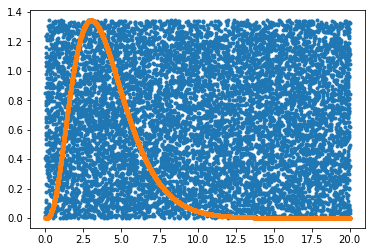

In [79]:
def fgamma(t, a=1):
    return (t**(a-1))*np.exp(-t)

# Monte-Carlo integration
def mcint(f, xlim, ylim, nsample=10000, a=1):
    x = np.random.uniform(low=xlim[0], high=xlim[1], size=nsample)
    y = np.random.uniform(low=ylim[0], high=ylim[1], size=nsample)
    fx = f(x, a=a)
    integ = np.sum(y<=fx)*1.0 / nsample * (xlim[1]-xlim[0])*(ylim[1]-ylim[0])
    return x,y,fx,integ

a = 4
ymax = ((a-1)**(a-1) * np.exp(-(a-1)))
x,y,fx,integ = mcint(fgamma, xlim=[0,20], ylim=[0, ymax], nsample=10000, a=a)
print('Monte-Carlo = ', integ, ', Error = ', abs(math.factorial(a-1)-integ) )
plt.plot(x,y,'.')
plt.plot(x,fx,'.')

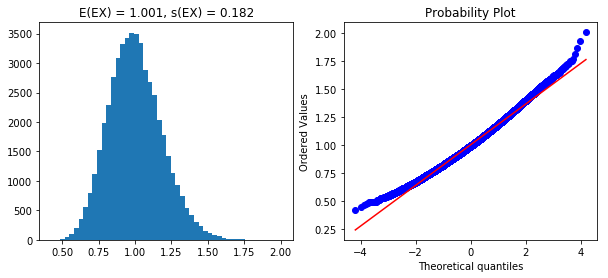

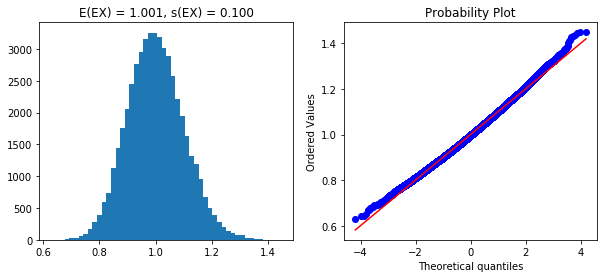

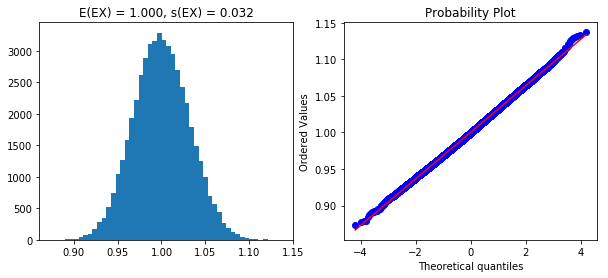

In [73]:
# Central limit theorem
import pylab

i = 1
for nsample in [30, 100, 1000]:
    plt.figure(i, figsize=(10, 4))
    i+=1
    nexp    = 50000

    #x = np.random.uniform(size=nsample*nexp).reshape(nexp, nsample)
    x = np.random.gamma(shape=1, scale=1, size=nsample*nexp).reshape(nexp, nsample)

    xmean = np.mean(x, axis=1)
    plt.subplot(1,2,1)
    hist = plt.hist(xmean, 50)
    plt.title('E(EX) = '+format(np.mean(xmean), '.3f')+', s(EX) = '+format(np.std(xmean),'.3f') )

    plt.subplot(1,2,2)
    stats.probplot(xmean, dist="norm", plot=pylab)
    pylab.show()
    

### Normal v.s. Cauchy v.s. Logistic distributions

**Normal distribution**

$$ f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2 \sigma^2}} $$

$$ E(X) = \mu;  Var(X) = \sigma^2 $$

**Cauchy distribution**

$$ F(x) = \frac{1}{\pi} arctan(x - \theta) $$

$$ f(x|\theta) = \frac{1}{\pi} \frac{1}{1+(x-\theta)^2} $$

$$ E(X) = \infty;  Var(X) = \infty $$

**Logistic (sigmoid) distribution**

$$ F(x) = \frac{1}{1+e^{-x}} = \frac{1}{2} + \frac{1}{2} tanh(\frac{x}{2}) $$

$$ f(x) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{e^x}{(1+e^x)^2} $$

$$ E(X) = 0;  Var(X) = \frac{\pi^2}{3} $$


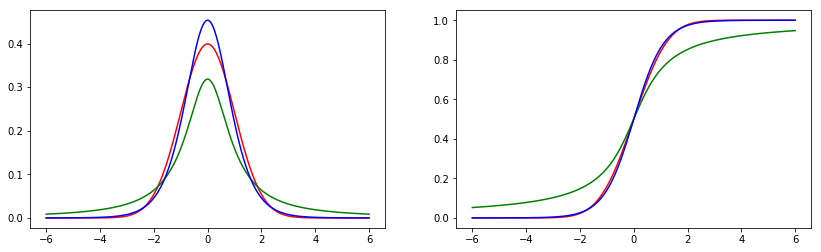

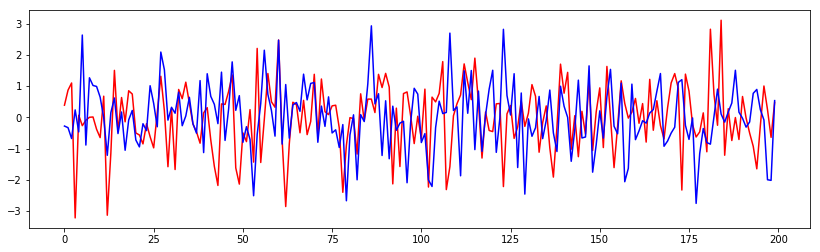

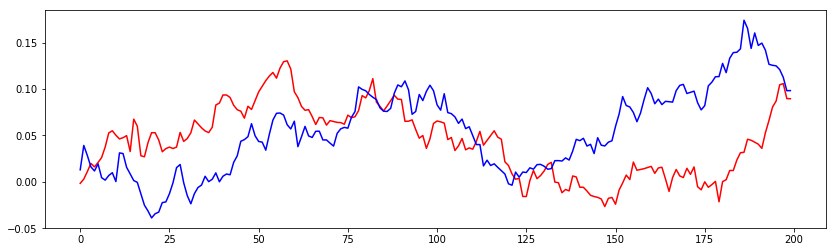

In [107]:
plt.figure(1, figsize=(14,4))
plt.subplot(1,2,1)
x = np.linspace(-6,6,1000)
plt.plot(x, stats.norm.pdf(x), 'r')
plt.plot(x, stats.cauchy.pdf(x), 'g')
plt.plot(x, stats.logistic.pdf(x, scale=np.sqrt(3)/np.pi), 'b')

plt.subplot(1,2,2)
plt.plot(x, stats.norm.cdf(x), 'r')
plt.plot(x, stats.cauchy.cdf(x), 'g')
plt.plot(x, stats.logistic.cdf(x, scale=np.sqrt(3)/np.pi), 'b')

plt.figure(2, figsize=(14,4))
n = 200
plt.plot(stats.norm.rvs(size=n), 'r')
#plt.plot(stats.cauchy.rvs(size=n), 'g')
plt.plot(stats.logistic.rvs(size=n, scale=np.sqrt(3)/np.pi), 'b')

plt.figure(3, figsize=(14,4))
n = 200; fac = 0.01
plt.plot(np.cumsum(fac*stats.norm.rvs(size=n)), 'r')
#plt.plot(np.cumsum(fac*stats.cauchy.rvs(size=n)), 'g')
plt.plot(np.cumsum(fac*stats.logistic.rvs(size=n, scale=np.sqrt(3)/np.pi)), 'b')
